In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB   

In [2]:
train_data    = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/trainData.csv')
train_labels  = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/trainLabels.csv')
test_data     = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/testData.csv')  
test_labels     = pd.read_csv('/content/drive/MyDrive/ML_Hw4/TinyMNIST/testLabels.csv')   

X_train = train_data.values; y_train = train_labels.values
X_test = test_data.values;   y_test  = test_labels.values

In [5]:
def calc_cost(X_train, X_test, y_train, y_test, selected_feature, feature):
    selected_feature = selected_feature.tolist()
    selected_feature.append(feature)
    X_train_cond = np.copy(X_train[:,selected_feature])
    X_test_cond = np.copy(X_test[:,selected_feature])
    clf = GaussianNB()  
    clf.fit(X_train_cond, y_train)
    y_pred = clf.predict(X_test_cond)
    return  accuracy_score(y_test, y_pred)
                           
def forward_selection(X_train, X_test, y_train, y_test, feature_number):
    remained_features = np.arange(0, X_train.shape[1])
    remained_features = remained_features.tolist()
    selected_feature = []
    total_cost = []
    while len(selected_feature)<feature_number:
      cost = []
      for feature in remained_features:
        cost_tmp = calc_cost(X_train, X_test, y_train, y_test, np.copy(selected_feature), feature)
        cost.append(cost_tmp)
      best_ind     =  cost.index(max(cost))
      best_feature =  remained_features[best_ind]
      selected_feature.append(best_feature)
      remained_features.remove(best_feature)
      total_cost.append(max(cost))
    print("************************************************************************: ",len(selected_feature))
    return selected_feature, total_cost

In [6]:
selected_feature, total_cost = forward_selection(X_train, X_test, y_train.reshape(len(y_train)), y_test.reshape(len(y_test)), feature_number = 196)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:450: RuntimeWarning: divide by zero encountered in log
  n_ij = - 0.5 * np.sum(np.log(2. * np.pi * self.sigma_[i, :]))
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:452: RuntimeWarning: invalid value encountered in true_divide
  (self.sigma_[i, :]), 1)
/usr/lo

************************************************************************:  196


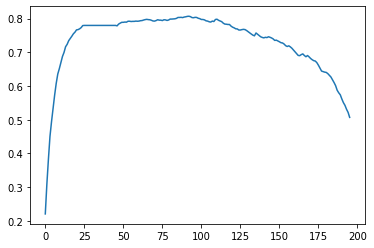

In [7]:
import matplotlib.pyplot as plt
plt.plot(total_cost)
#selected_feature

In [ ]:
total_cost[90]

0.8051220488195278